# Introduction to Machine Learning in Python

This tutorial provides a practical introduction to machine learning (ML) using Python. The goal is to help you quickly become familiar with the essential components of an ML workflow and begin applying models to real-world scientific data. We will prioritize usability and clarity over theoretical detail, enabling you to gain hands-on experience without requiring a background in statistics or optimization.

---

## Objectives

By the end of this tutorial, you will be able to:

- Understand the structure of a standard machine learning pipeline.
- Load, preprocess, and visualize datasets commonly used in scientific research.
- Apply supervised learning algorithms.
- Evaluate model performance using appropriate metrics.
- Modify and experiment with models to explore their behavior on new data.

## What is Machine Learning?

Machine learning (ML) is a subfield of computer science and applied mathematics focused on developing algorithms that learn patterns from data. Unlike traditional programming, where specific instructions are manually coded, machine learning algorithms infer rules and structure automatically from examples, optimizing performance on a specific task by minimizing a defined objective function.

At its core, an ML model is a parameterized function $ f_\theta: X \rightarrow y $  that maps input variables $X $ to outputs $ y $. The model learns by adjusting parameters $ \theta $ to reduce the discrepancy between predictions $ \hat{y} = f_\theta(X) $ and known outputs $ y $, typically by minimizing a loss function.

---

### Types of Machine Learning

#### Supervised Learning

Supervised learning is the most widely used and studied setting in machine learning. It requires a labeled dataset — a collection of input-output pairs $ (X, y)$ — and aims to learn a function that generalizes well to new, unseen data.

Supervised learning encompasses two major problem types:

- **Regression**: Predict a continuous value (e.g., temperature, concentration, energy).
- **Classification**: Predict a categorical label (e.g., presence/absence, phase of matter, object type).

Key elements include:

- A training dataset with known inputs and outputs.
- A loss function that quantifies prediction error (e.g., mean squared error, cross-entropy).
- An optimization procedure (often gradient-based) to minimize the loss.

The effectiveness of supervised learning depends on the quality and representativeness of the training data, the choice of model class, and the ability to avoid underfitting or overfitting.

#### Unsupervised Learning

Unsupervised learning deals with data that has no explicit labels. The goal is to uncover hidden structure or reduce dimensionality. Common tasks include clustering, principal component analysis (PCA), Empircal Orthogonal Functions (EOF), density estimation, Tensor decompositions, etc...

#### Reinforcement Learning (RL)

Reinforcement learning is a third paradigm where an agent interacts with an environment and learns to make decisions through trial and error. Instead of labeled examples, the agent receives **rewards** that reflect the quality of its actions and aims to learn a policy that maximizes cumulative reward over time. RL is often applied


# Importing Packages

In [1]:
!pip install seaborn
!pip install xarray
!pip install pooch

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

Before diving into data analysis or machine learning, it's helpful to understand the role of each core package used in scientific Python workflows.

---

### `import numpy as np`

**NumPy** is the foundational package for numerical computing in Python.

- Provides the `ndarray` object for fast and efficient array/matrix operations.
- Includes mathematical functions, linear algebra tools, and random number generation.
- Forms the base for many higher-level libraries in the scientific stack.

---

In [3]:
# Create a 1D array
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])

# Create a 2D array (matrix)
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [4]:
# Arithmetic operations
print("Addition:", x + y)
print("Multiplication:", x * y)

# Mathematical functions
print("Exponential:", np.exp(x))
print("Sine:", np.sin(x))

# Aggregation
print("Mean:", np.mean(y))
print("Sum:", np.sum(y))

# Matrix multiplicatoin
print("Matrix/vector mult:", A@x)

Addition: [11 22 33]
Multiplication: [10 40 90]
Exponential: [ 2.71828183  7.3890561  20.08553692]
Sine: [0.84147098 0.90929743 0.14112001]
Mean: 20.0
Sum: 60
Matrix/vector mult: [14 32 50]


In [5]:
# Create arrays filled with zeros, ones, or random values
zeros = np.zeros((2, 3))
ones = np.ones((3, 2))
rand = np.random.rand(2, 2)

In [6]:
# Basic indexing:
B = np.array([[10, 20, 30],
              [40, 50, 60],
              [70, 80, 90]])

# Access single elements
print("Element at (0, 1):", B[0, 1])

# Access a full row
print("Second row:", B[1, :])

# Access a full column
print("Third column:", B[:, 2])

Element at (0, 1): 20
Second row: [40 50 60]
Third column: [30 60 90]


### `import xarray as xr`

**Xarray** is a powerful library for working with multi-dimensional labeled data.

- Adds labels to NumPy arrays with named dimensions and coordinates.
- Especially useful for working with datasets like climate data, model simulations, or NetCDF files.
- Enables intuitive slicing and operations across dimensions like `(time, latitude, longitude)`.

---

### `import matplotlib.pyplot as plt`

**Matplotlib** is the core plotting library for Python, and `pyplot` is its state-based interface.

- Allows creation of static, interactive, and animated visualizations.
- Commonly used for line plots, scatter plots, histograms, and figure customization.

---

### `import seaborn as sns`

**Seaborn** is a statistical data visualization library built on top of Matplotlib.

- Makes it easier to generate attractive and informative graphics.
- Works well with `pandas.DataFrame` and integrates statistical summaries directly into plots.
- Supports plot types like box plots, violin plots, heatmaps, and regression plots.

---

### `import sklearn` (or specific modules, e.g. `from sklearn.linear_model import LinearRegression`)

**Scikit-learn** is one of the most widely used machine learning libraries in Python.

- Provides simple and efficient tools for predictive data analysis.
- Includes implementations of many common ML algorithms: linear regression, decision trees, support vector machines, clustering (e.g., KMeans), and more.
- Designed to work seamlessly with NumPy
- Emphasizes a consistent interface: `.fit()` to train, `.predict()` to make predictions.

---

# Data Loading + Basics of Xarray

## Introduction to `xarray`

[`xarray`](http://xarray.pydata.org/en/stable/) is a Python library designed for working with labeled, multi-dimensional arrays.  
It is especially popular in scientific fields like **climate science**, **oceanography**, and **geophysics**, where datasets often have multiple dimensions such as **time**, **latitude**, and **longitude**.

Unlike raw NumPy arrays, `xarray` objects:
- Attach **names** to dimensions (e.g., `"time"`, `"latitude"`, `"longitude"`)
- Attach **coordinates** (actual values along each axis)
- Make it easier to select, manipulate, and visualize complex data



`xarray` provides a few **example datasets** through its `tutorial` module.  
These datasets are small, real-world datasets commonly used for learning and experimentation.

In this tutorial, we will use the **ERSSTv5** dataset (NOAA Extended Reconstructed Sea Surface Temperature, Version 5), which contains historical sea surface temperature fields.

---

First, we import `xarray` and load the dataset:

In [7]:
# Load ERSSTv5 dataset
ds = xr.tutorial.load_dataset('ersstv5')

# Display basic information
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 10kB 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (time, lat, lon) float32 40MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

## Dataset Format

The loaded object `ds` is an **`xarray.Dataset`** — a collection of labeled data arrays sharing the same coordinates.

**Important parts:**
- **Dimensions**: `time`, `latitude`, `longitude`
- **Data variables**:
  - `sst`: Sea Surface Temperature (units: °C)

You can access variables directly:

In [8]:
# Access the Sea Surface Temperature (SST) variable
sst = ds['sst']

sst

<xarray.DataArray 'sst' (time: 624, lat: 89, lon: 180)> Size: 40MB
array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

---
This is often too much information to digest, and we just care about the actual dataset.

If you just want the data as a NumPy array (drop all the attached data), you can perform

In [9]:
sst_data = sst.data

sst_data

array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

---
The **coordinates** of the dataset are found in a similar way:

In [10]:
lat = ds.lat.data
lon = ds.lon.data

print("Latitude coordinates:")
print(lat)
print("Longitude coordinates:")
print(lon)

Latitude coordinates:
[ 88.  86.  84.  82.  80.  78.  76.  74.  72.  70.  68.  66.  64.  62.
  60.  58.  56.  54.  52.  50.  48.  46.  44.  42.  40.  38.  36.  34.
  32.  30.  28.  26.  24.  22.  20.  18.  16.  14.  12.  10.   8.   6.
   4.   2.   0.  -2.  -4.  -6.  -8. -10. -12. -14. -16. -18. -20. -22.
 -24. -26. -28. -30. -32. -34. -36. -38. -40. -42. -44. -46. -48. -50.
 -52. -54. -56. -58. -60. -62. -64. -66. -68. -70. -72. -74. -76. -78.
 -80. -82. -84. -86. -88.]
Longitude coordinates:
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196.

---
`Exercise:`  Figure out the dates covered by this dataset

---
You can also easily **select specific slices**:

In [11]:
# Get SST for the first time slice
sst_first_month = sst.isel(time=0)

# Get SST at a specific latitude and longitude
sst_at_point = sst.sel(lat=30, lon=240, method='nearest')

---
Finally, basic computations can be performed directly in `xarray`:

In [12]:
global_mean_sst = ds['sst'].mean(dim=['lat', 'lon'])

##  Visualization

Let's visualize the global sea surface temperature for a single month:

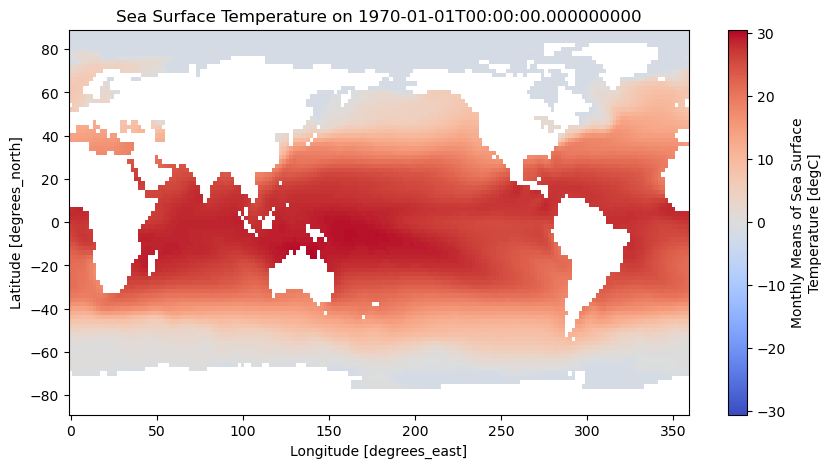

In [13]:
# Pick the first month
sst_first_month = ds['sst'].isel(time=0)

# Plot it
plt.figure(figsize=(10, 5))
sst_first_month.plot(cmap='coolwarm')
plt.title(f"Sea Surface Temperature on {sst_first_month['time'].values}")
plt.show()

We can also plot how the **global average** SST changes over time:

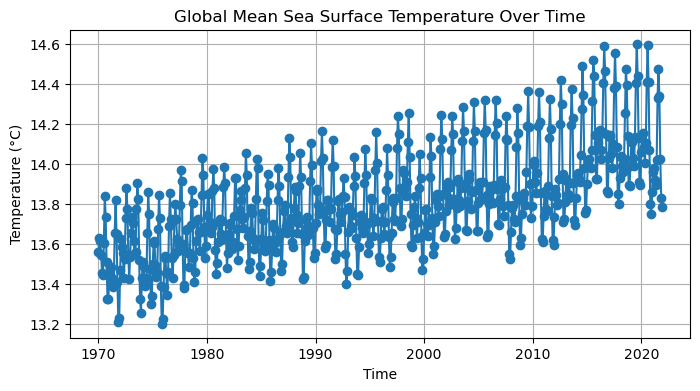

In [14]:
# Compute spatial average
global_mean_sst = ds['sst'].mean(dim=['lat', 'lon'])

# Plot time series
plt.figure(figsize=(8, 4))
global_mean_sst.plot(marker='o')
plt.title("Global Mean Sea Surface Temperature Over Time")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.show()

# Intro to Machine Learning

In this section, we introduce the basic structure of a **Machine Learning pipeline**.

We will focus on **supervised learning** for **regression tasks**, where the goal is to predict continuous values from input data.  

**Our task:**  Given the SST field $x(t)$, predict $x(t+1)$. 

## The ML Pipeline Overview

A typical ML workflow follows these basic steps:

| Step | Description |
|:----:|:------------|
| 1 | **Load the data**: Import the dataset you want to model. |
| 2 | **Split into training and testing sets**: Hold out some data to evaluate the model later. |
| 3 | **Pre-process the data**: Clean, standardize, and prepare features. |
| 4 | **Train a model**: Fit a function to the training data. |
| 5 | **Test the model**: Assess how well the model predicts on new (unseen) data. |

## 1. Loading the dataset

We just covered how we will import the dataset, but we haven't removed Nan values (where land is), which will cause issues.  For completeness, we will do that here:

Here we will 
1. Load the sst data
2. Flatten the 2d space field to a 1d vector
3. Remove the nan values

In [15]:
# Load dataset
ds = xr.tutorial.load_dataset('ersstv5')

# Get SST field
sst = ds['sst']  # (time, lat, lon)

# Flatten lat/lon grids
n_time, n_lat, n_lon = sst.shape
n_features = n_lat * n_lon

# Flatten each time slice into a vector
X_full = sst.values.reshape((n_time, n_features))

# Handle missing values (mask points that are NaN in any time slice)
valid_mask = ~np.any(np.isnan(X_full), axis=0)  # keep only ocean points with no NaNs across time
X_full = X_full[:, valid_mask]  # only valid ocean points remain

In [16]:
print("Shape of X (time,space):", X_full.shape)

Shape of X (time,space): (624, 10988)


## 2. Train/Test and Input/output Split

In this section, we will cover the how and why we:

1. Split data into training/testing
2. Form input/output pairs, specifically for temporal data
---

### Train/Test (and Validation) Splits


A fundamental part of any machine learning workflow is how the dataset is divided. The goal is to evaluate a model's performance on **unseen data**, so we must carefully separate our data into different roles:

---

#### Training Set

- Used to fit the parameters of the model.
- The model learns directly from this subset of the data.

---

#### Test Set

- Held out from the beginning and used only at the **end** of the development process.
- Provides an **unbiased estimate** of how the final model will perform on truly unseen data.
- No model decisions (hyperparameters, architecture, etc.) should be based on test performance.

---

#### Validation Set (Optional but often necessary)

A **validation set** is used during the training process to evaluate intermediate models and make decisions about model design. Use a validation set if you are:

- Tuning hyperparameters (e.g., regularization strength, number of trees).
- Comparing different models or feature sets.
- Applying early stopping in iterative training (e.g., in neural networks).
- Trying different data preprocessing or augmentation strategies.

Without a validation set, you risk **overfitting to the test set**, even if you never explicitly train on it.

---

#### Typical Splitting Strategies

- **Simple Split**:  
  - 70–80% training  
  - 10–15% validation  
  - 10–15% test

- **Cross-Validation (CV)**:  
  For small datasets, a dedicated validation set may waste data. Instead, use k-fold CV on the training set to simulate multiple train/validation splits, then evaluate the best model on the test set.

---

#### Summary

| Subset        | Purpose                    | Used During Training? | Used for Tuning? | Used for Final Evaluation? |
|---------------|-----------------------------|------------------------|------------------|-----------------------------|
| Training Set   | Learn model parameters      | ✅ Yes                 | ❌ No            | ❌ No                        |
| Validation Set | Tune hyperparameters/models | ✅ Yes                 | ✅ Yes           | ❌ No                        |
| Test Set       | Final unbiased evaluation   | ❌ No                  | ❌ No            | ✅ Yes                       |

---

In this tutorial, we will begin with a **train/test split**, and later introduce validation splits as we begin tuning model behavior.

### Handling Inputs and Outputs for Temporal Data

Recall that for supervised learning, the goal is to fit some function $ f_\theta: X \rightarrow y $  that maps input variables $X $ to outputs $ y $. When splitting data into test/train pairs, we should also create input/output pairs $(X,y)$.

In machine learning tasks involving **time series or temporal data**, careful handling of input/output structure is essential. Unlike standard datasets, temporal data is **ordered**, and the relationships across time steps must be preserved.

---

#### Problem Setup

The goal is often to use **past information** to predict **future values**, and never the other way around! This requires transforming your time series into input/output pairs which preserve the temporal order. 

For example, suppose you have a univariate time series:

$$
x = [x_0, x_1, x_2, \dots, x_{T}]
$$

To predict future values, you can frame the problem as:

- **Input**: a fixed-size window of past values  
- **Output**: the value(s) at a future time

---

#### Sliding Window Format

Let $ N $  be the input window size, and $ M $ the prediction horizon. Then for each training example, you construct:

- $ X_t = [x_t, x_{t+1}, \dots, x_{t+N-1}] $  
- $ y_t = x_{t+N+M-1} $ (or a sequence if multistep prediction is used)

For example, if $N = 3$ and $M = 2$, this transforms the sequence into a supervised dataset of the form:

| Inputs (X)               | Target (y)      |
|--------------------------|------------------|
| [x₀, x₁, x₂]             | x₄               |
| [x₁, x₂, x₃]             | x₅               |
| [x₂, x₃, x₄]             | x₆               |
| ...                      | ...              |

This method is called **rolling window** or **sliding window sampling**, and it generalizes naturally to multivariate and multidimensional data.

---


### Connecting Test/Train split to Input/Outputs for Temporal Data

It is common in machine learning to randomly select 80/20 splits. 
In time-dependent problems like ours (forecasting SST), there are two major risks:

---

#### 1. Data Leakage Between Train and Test

If information from the future "leaks" into the training data, the model will appear to perform **unrealistically well** — because it has seen part of the test data during training.

Common leakage examples:
- Using overlapping time periods in train and test.
- Accidentally using future measurements in the training input.
- Standardizing features **across all data**, not just training data (data drift influences mean).

**In this tutorial, we avoid leakage by:**
- Keeping the time order: no shuffling the data before splitting.
- Only training on past data to predict future data.
- Fitting preprocessing (e.g., standardization) separately

---

#### 2. Input/Output Overlap

In time series prediction, **input and output pairs must be correctly separated**.

Problematic situation:
- If we are using SST at time $ t $ as input, and SST at time $ t $ as output, the model would trivially "predict" the same field — no forecasting is learned.

Correct structure:
- **Input**: SST at time $ t $
- **Output**: SST at time $ t+1 $

Thus, each training pair is carefully offset by one time step.

If we accidentally let the input and output be from the same month, **we're not forecasting** — we are just copying.

In our setup:
- `X = SST at times [t₀, t₁, t₂, ..., tₙ₋₁]`
- `y = SST at times [t₁, t₂, t₃, ..., tₙ]`

where `X[i]` corresponds to `y[i]` (one month later).

---

#### Summary:

- Use the **first 80%** of months for training
- Use the **last 20%** for testing
```text
|<---- Train ---->|<---- Test ---->|
x₀       xₜ        x_T
```
- No shuffling of time indices
- Build input/output pairs carefully with time offset

If we had more models/ensembles of data, we would have to consider how to best combine those sets of data as well. 

- **Train on past data**, **evaluate on future data**.
- Do **not shuffle** your data before splitting.

---

### Example - Test/train with Input/output Split

Recall our **goal**:  Use SST $x[t]$ to predict $y = x[t+1]$

In [17]:
# Grab X and y data:

# X[t] → y[t] = X[t+1]
X = X_full[:-1]   # all but last time
y = X_full[1:]    # all but first time

print("Total samples:", X.shape[0])
print("Feature dimension:", X.shape[1])

Total samples: 623
Feature dimension: 10988


Split chronologically so the model never “sees the future”:

In [18]:
# 80/20 chronological split
n_samples = X.shape[0]
train_size = int(n_samples * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train samples:", X_train.shape[0])
print("Test  samples:", X_test.shape[0])

Train samples: 498
Test  samples: 125


Prewritten code exists to do the splitting above within SkLearn:

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # No shuffling — time order matters
)

## 3. Pre-Processing Data

Real-world datasets often have issues like:
- Features with very different magnitudes (e.g., degrees Celsius vs. kilometers)
- Missing values
- Categorical variables (e.g., "yes", "no") that need to be encoded numerically

Pre-processing ensures that:
- The model trains efficiently and correctly
- Features are balanced (especially important for models like linear regression or neural networks)
- Errors or outliers don't dominate the model

In our case (predicting sea surface temperatures), we will **standardize** the input features to have zero mean and unit variance:

$$ z = (x - \mu) / \sigma$$

Sklearn has a built in to perform standardization.

---
Recall:

- **All** the training data is `observed`.  So we can use the mean/std of the training data to transform the training data.
- The testing data is `not observed`.  If we scale the test data using its mean/std, we are using future information not available in practice.  This could lead to unrealstic model performance.  We should therefore use mean/std of training for testing.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Feature scaler
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train) #fit and transform train data
X_test_scaled = x_scaler.transform(X_test) #transform test data using train data

# Output scaler
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train) #fit and transform train data
y_test_scaled = y_scaler.transform(y_test) #transform test data using train data

## 4. Model Training (Linear regression example)

Now that we have prepared our dataset, now is when we would train our model $f_\theta:X \rightarrow y$.

For our first example, let us build a simple **Linear Regression** model. Linear regression is technically a ML method, and something familiar to build a baseline off of. 

---

###  How Linear Regression Works

In linear regression, we model the relationship between the inputs $ X $ and the output $ y $ as:

$$
y = X\beta + \epsilon
$$

where:
- $ y $ is the target variable (in our case, the future SST field),
- $ X $ is the matrix of input features (current SST field),
- $ \beta $ is a vector of model parameters (coefficients),
- $ \epsilon $ is random noise (unexplained variability).

The goal is to learn the best-fitting parameters $ \beta $.

---

###  The Loss Function

The model parameters are found by minimizing the **mean squared error** between the predicted and true outputs.

Specifically, we solve:

$$
\hat{\beta} = \underset{\beta}{\mathrm{argmin}} \; \|y - X\beta\|_2^2 =  \underset{\beta}{\mathrm{argmin}} \; \sum_{i=1}^{n_{\text{train}}} (y_i - x_i^t \beta)^2
$$

This means:
- Find the $ \beta $ that minimizes the squared difference between predictions and true outputs.
- $\beta$ has the same length as each SST sample $x_i$

You might not think of Linear regression in this way - but all ML algorithms use a loss fuction like the equation above to optimize.  This has a closed-form solution for linear regression, but here we will use a standard machine learning library to solve it automatically.

---

###  Fitting Linear Regression Using `scikit-learn`

We can now train a linear regression model using the `sklearn.linear_model.LinearRegression` class.



In [23]:
# Step 1: Import the model
from sklearn.linear_model import LinearRegression

# Step 2: Initialize the model
model = LinearRegression()

# Step 3: Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

print("Model done training")

Model done training


## 5. Model Testing

Now we can evaluate how well the model generalizes to new (unseen) data. After training, we use the **testing set** to measure:
- How accurate the model’s predictions are
- Whether the model **overfit** (memorized training data instead of generalizing)

We use evaluation metrics like:
- **Mean Squared Error (MSE)**
- **R² score** (coefficient of determination)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R^2 Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"R^2 Score on Test Set: {r2:.4f}")

Mean Squared Error on Test Set: 51.7216
R^2 Score on Test Set: -153931195.8974


**Lets visualize how bad we did!**

In [26]:
# This function is used to plot results
def plot_sst_sample(sample_idx, y_test, y_pred, valid_mask, ds, X):
    """
    Visualize true vs. predicted Sea Surface Temperature (SST) for a given test sample.

    Parameters:
        sample_idx (int): Index of the test sample to visualize.
        y_test (np.ndarray): Ground truth SST values (flattened, masked).
        y_pred (np.ndarray): Predicted SST values (flattened, masked).
        valid_mask (np.ndarray): Boolean mask indicating ocean points (True) vs land (False).
        ds (xarray.Dataset): Original dataset with dimensions and time metadata.
        X (np.ndarray): Full input array used to infer time indexing.
    """
    # Safely get dimensions
    n_lat = ds.sizes['lat']
    n_lon = ds.sizes['lon']

    # Get test sample
    y_true_sample = y_test[sample_idx]
    y_pred_sample = y_pred[sample_idx]

    # Initialize full arrays with NaNs
    sst_true_full = np.full((n_lat * n_lon,), np.nan)
    sst_pred_full = np.full((n_lat * n_lon,), np.nan)
    sst_resid_full = np.full((n_lat * n_lon,), np.nan)

    # Fill valid ocean values
    sst_true_full[valid_mask] = y_true_sample
    sst_pred_full[valid_mask] = y_pred_sample
    sst_resid_full[valid_mask] = y_true_sample - y_pred_sample

    # Reshape to (lat, lon)
    sst_true_grid = sst_true_full.reshape(n_lat, n_lon)
    sst_pred_grid = sst_pred_full.reshape(n_lat, n_lon)
    sst_resid_grid = sst_resid_full.reshape(n_lat, n_lon)

    # Compute corresponding time
    n_total_samples = X.shape[0]
    n_train = int(0.8 * n_total_samples)
    time_selected = ds['time'].values[n_train + sample_idx + 1]  # +1 for prediction lag

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(22, 6))

    sns.heatmap(sst_true_grid, ax=axes[0], cmap='coolwarm', cbar=True)
    axes[0].set_title("True SST")

    sns.heatmap(sst_pred_grid, ax=axes[1], cmap='coolwarm', cbar=True)
    axes[1].set_title("Predicted SST")

    sns.heatmap(sst_resid_grid, ax=axes[2], cmap='bwr', center=0, cbar=True)
    axes[2].set_title("Residual (True - Predicted)")

    plt.suptitle("Sea Surface Temperature Prediction vs. Truth", fontsize=18, y=1.05)

    # Add time annotation
    time_str = np.datetime_as_string(time_selected, unit='M')
    fig.text(0.5, -0.05, f"Month Predicted: {time_str}", ha='center', fontsize=18)

    plt.tight_layout()
    plt.show()


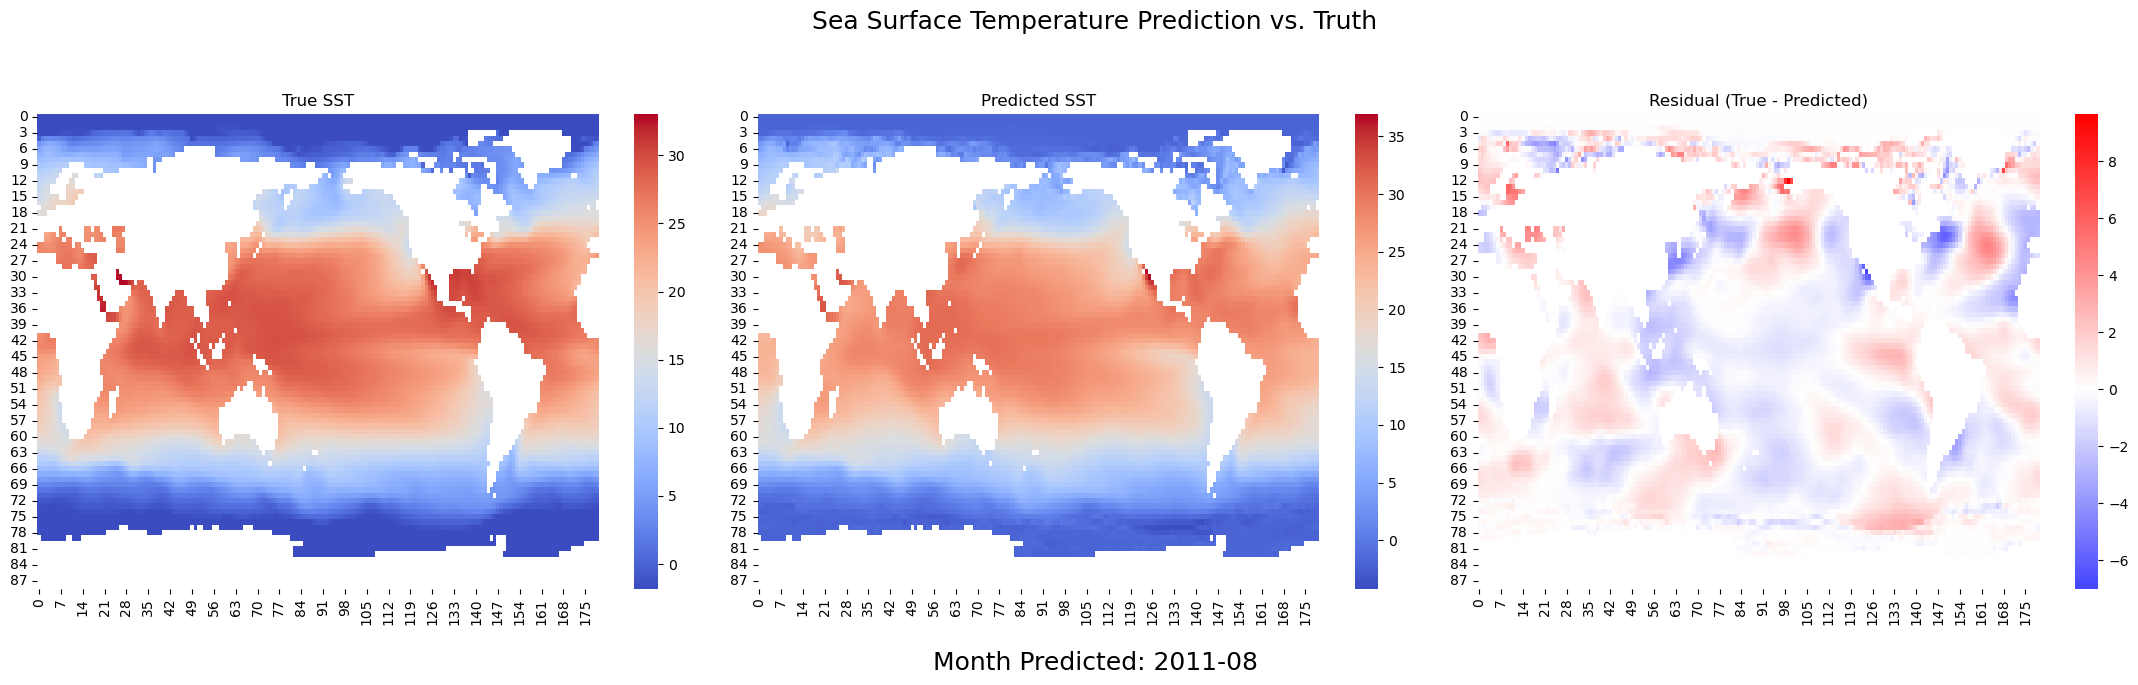

In [27]:
sample_idx = 0
plot_sst_sample(sample_idx, y_test, y_pred, valid_mask, ds, X)

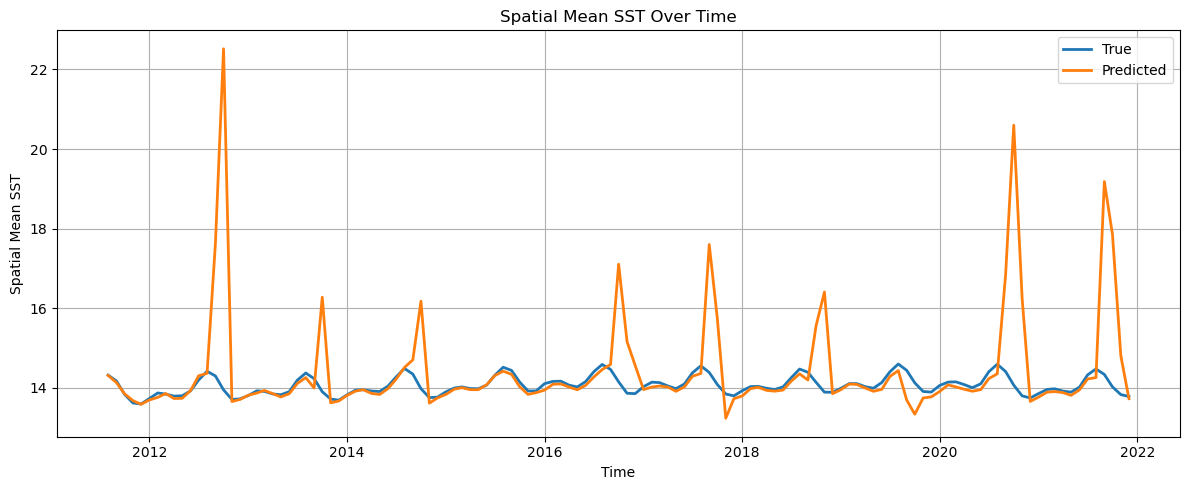

In [28]:
# Compute spatial mean at each time step
mean_true_time_series = np.nanmean(y_test, axis=1)  # shape: (time,)
mean_pred_time_series = np.nanmean(y_pred, axis=1)  # shape: (time,)

# Get corresponding time values (optional)
n_total_samples = X.shape[0]
n_train = int(n_total_samples * 0.8)
time_vals = ds['time'].values[n_train + 1 : n_train + 1 + y_test.shape[0]]

# Plot time series of spatial means
plt.figure(figsize=(12, 5))
plt.plot(time_vals, mean_true_time_series, label='True', linewidth=2)
plt.plot(time_vals, mean_pred_time_series, label='Predicted', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Spatial Mean SST")
plt.title("Spatial Mean SST Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Regularization

When fitting a model to data, the goal is to capture the underlying structure while avoiding overfitting — i.e., fitting noise or random fluctuations in the training data. One of the most effective ways to prevent overfitting is through **regularization**.

---

### Why Regularize?

In ordinary least squares (OLS), we minimize the sum of squared errors:

$$
\min_{\beta} \|y - X\beta\|_2^2
$$

If the number of features is large, or if features are highly correlated (multicollinearity), the solution can have:

- **Large coefficient values**, leading to instability and overfitting.
- **High variance**, where small changes in the input lead to large changes in predictions.

Regularization addresses this by adding a penalty term to the loss function that *discourages overly complex models*.

---

### Ridge Regression (L2 Regularization)

**Ridge regression** adds an $ \ell_2 $ penalty to the coefficients:

$$
\min_{\beta} \|y - X\beta\|_2^2 + \alpha \|\beta\|_2^2
$$

- $ \|\beta\|_2^2 = \sum_j \beta_j^2 $ penalizes large weights.
- $ \alpha \geq 0 $ controls the strength of the regularization:
  - $ \alpha = 0 $: ordinary least squares (no penalty).
  - Larger $ \alpha $: stronger penalty → more bias, less variance.

**Intuition:**

- Ridge regression **shrinks** the coefficients toward zero.
- It **does not eliminate** any variables, but reduces the magnitude of less informative ones.
- It can greatly improve performance when predictors are noisy or collinear.

--- 
```python
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)
```
--- 
### Lasso Regression (L1 Regularization)

**Lasso regression** is a regularized version of linear regression that adds an  $ \ell_1 $ penalty to the objective function. The name **LASSO** stands for *Least Absolute Shrinkage and Selection Operator*.

The optimization problem is:

$$
\min_{\beta} \|y - X\beta\|_2^2 + \alpha \|\beta\|_1
$$

Where:

- $ \|\beta\|_1 = \sum_{j=1}^p |\beta_j| $ is the **L1 norm** of the coefficients.
- $ \alpha \geq 0 $ is a hyperparameter that controls the strength of the penalty, just like Ridge.


**Intuition:**

- Lasso encourages **sparsity** in the coefficient vector $\beta $.
- As $ \alpha $ increases, more coefficients are **shrunk toward zero**, and some may become **exactly zero**.
- This means Lasso can perform **automatic feature selection**, keeping only the most relevant variables in the model.

---

```python
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Fit Lasso regression with L1 regularization
model = Lasso(alpha=0.1)  # alpha controls the strength of regularization
model.fit(X_train_scaled, y_train)
```
---

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
alpha = 1

# Initialize and fit Ridge regression
model = Ridge(alpha=alpha) 
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression")
print(f"Test MSE: {mse:.4f}")
print(f"Test R²:  {r2:.4f}")

Ridge Regression
Test MSE: 48.7994
Test R²:  -151683328.5385


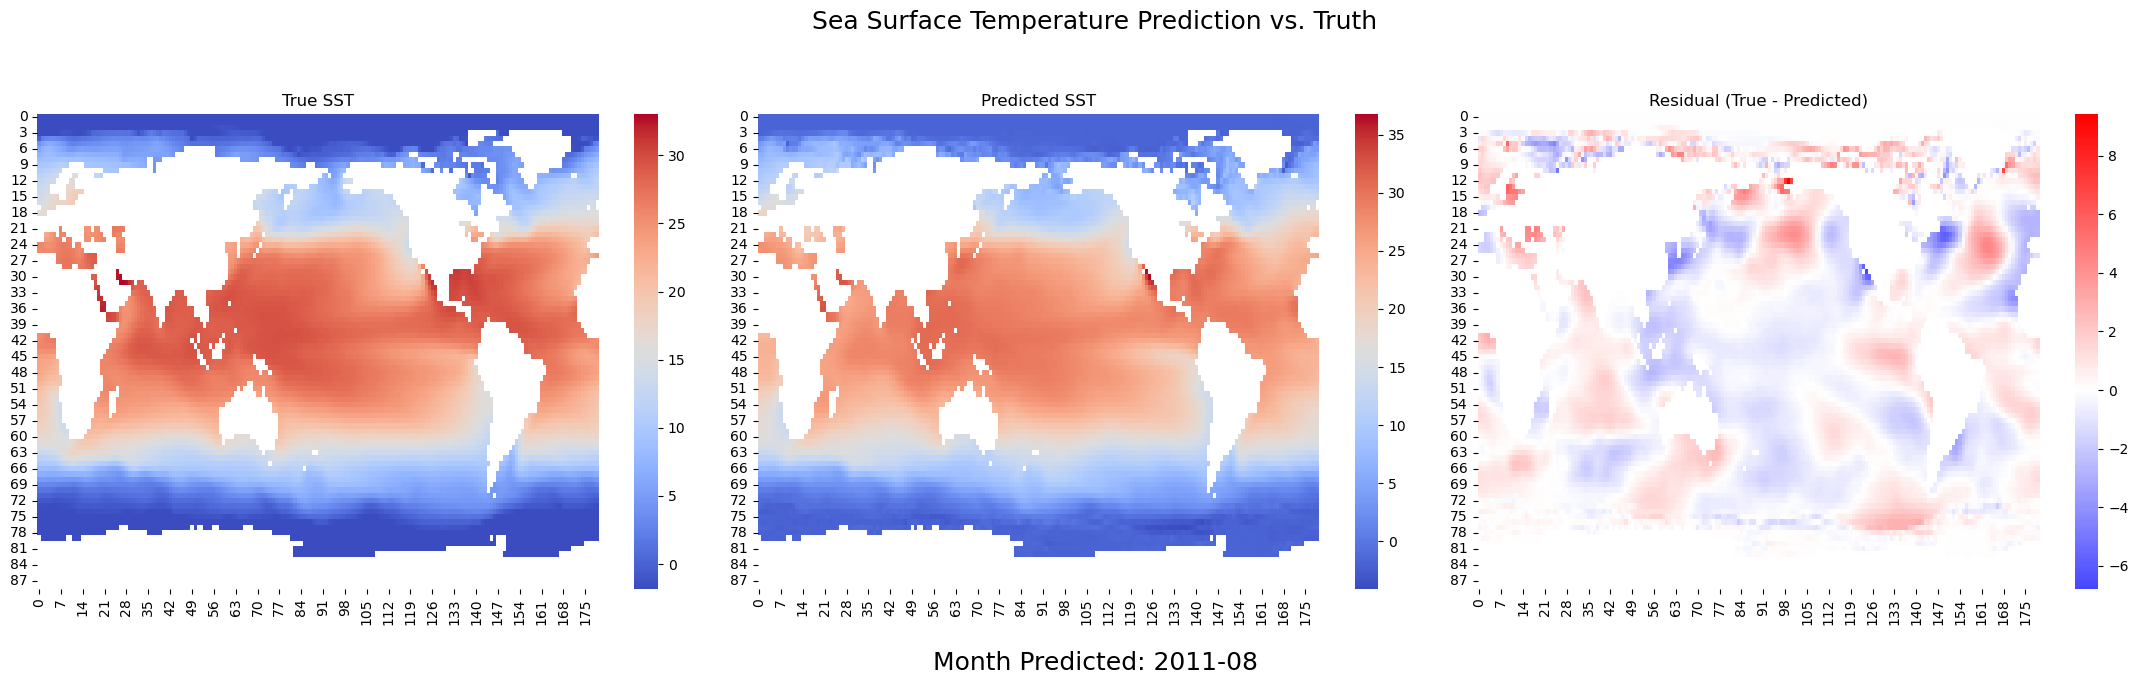

In [31]:
sample_idx = 0
plot_sst_sample(sample_idx, y_test, y_pred, valid_mask, ds, X)

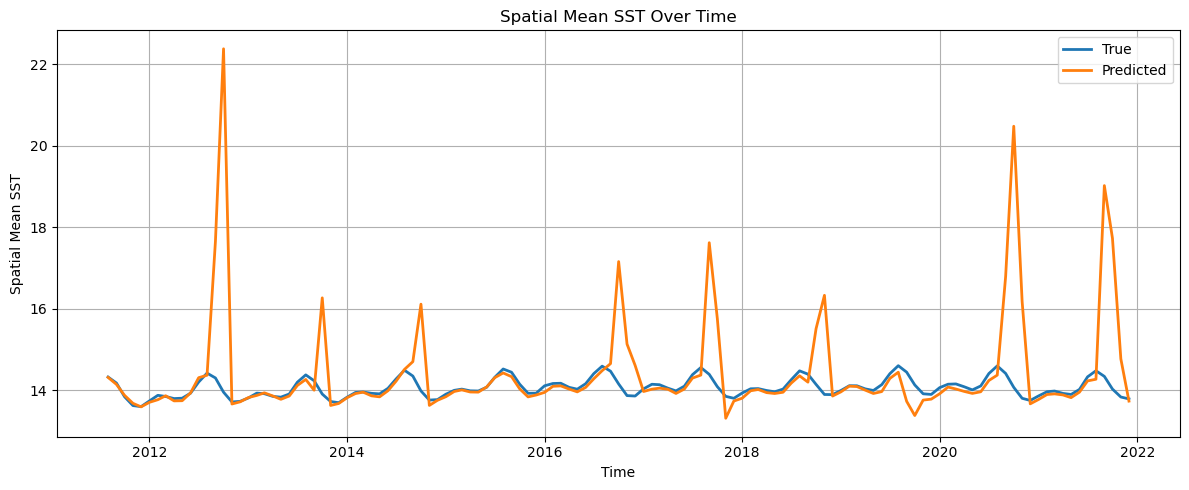

In [32]:
# Compute spatial mean at each time step
mean_true_time_series = np.nanmean(y_test, axis=1)  # shape: (time,)
mean_pred_time_series = np.nanmean(y_pred, axis=1)  # shape: (time,)

# Get corresponding time values (optional)
n_total_samples = X.shape[0]
n_train = int(n_total_samples * 0.8)
time_vals = ds['time'].values[n_train + 1 : n_train + 1 + y_test.shape[0]]

# Plot time series of spatial means
plt.figure(figsize=(12, 5))
plt.plot(time_vals, mean_true_time_series, label='True', linewidth=2)
plt.plot(time_vals, mean_pred_time_series, label='Predicted', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Spatial Mean SST")
plt.title("Spatial Mean SST Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Exercise:** Now try LASSO regression.  Which one performs better?

**Exercise:** Try different regularization parameters.  Try to find the best penalized linear model you can.  How might you automate this?

**Exercise**:  Optmize both.  Which appears to be better overall? 

# Nonlinear Regression via Kernel Ridge Regression

We now introduce a way to model **nonlinear relationships** between inputs and outputs:  **Kernel methods**.

Kernel methods are a powerful "in-between" tool:
- They allow models to capture complex nonlinear patterns
- They are especially effective for **small to medium datasets**
- They are mathematically elegant and often very performant without needing deep networks

---

## Intuition Behind Kernel Methods

Linear models fit a **straight line** (or hyperplane) to the data.  However, **real-world data is often curved or nonlinear**.


**Idea**:  
Instead of fitting a straight line in the original space,  we transform the data into a higher-dimensional **feature space** where the relationship becomes more linear. This process done via a choice of **feature map**:

$$
\phi: \mathbb{R}^d \rightarrow \mathbb{R}^D \quad (D \gg d)
$$

where:
- $ d $ = dimension of original input space (e.g., SST snapshot)
- $ D $ = dimension of feature space (potentially infinite!)

In the higher-dimensional space, a **linear model** can now fit the data better.

**The Kernel Trick:**

Kernel methods allow us to **implicitly** compute this feature mapping without ever needing to construct the high-dimensional vectors $\phi(x)$ explicitly.

Ultimately, we don't care about the value of $\phi(x)$ and $\phi(x')$, but rather how close they are (so we can perform a linear regression). 

This is done using a **kernel function** $ K(x, x') $, which measures "similarity" between two inputs in the $\phi$ space. 


---

### From Linear to Nonlinear

In linear regression, the prediction function is:

$$
\hat{y}(x) = x^\top \beta
$$

This is limited to linear relationships between input and output. Kernel Regression replaces the inner product $ x^\top x' $ with a **kernel function**  $K(x, x') $, which represents the inner product in a high-dimensional feature space:

$$
\hat{y}(x) = \sum_{i=1}^n \beta_i K(x, x_i)
$$


Here:
- $ x_i $ are the training samples.
- $\beta$ is a vector of learned coefficients.
- $ K(x, x') $ is a **kernel function**, such as:
  - Linear: $ K(x, x') = x^\top x' $
  - Polynomial: $K(x, x') = (x^\top x' + c)^d $
  - Gaussian RBF: $ K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right) $


---

### Optimization Objective

Recall  Ridge regression solved:

$$
\min_{\beta} \|y - X\beta\|_2^2 + \alpha \|\beta\|_2^2
$$

Kernel ridge solves the following regularized least squares problem in kernel space:

$$
\min_{\beta} \|y - K\beta\|_2^2 + \alpha \beta^\top K \beta
$$

where:
- $ K \in \mathbb{R}^{n \times n} $ is the kernel matrix: $ K_{ij} = K(x_i, x_j) $
- $ \alpha > 0 $ is the regularization parameter

---

### Scikit-learn Implementation

Scikit-learn provides a convenient implementation via `KernelRidge`:

```python
from sklearn.kernel_ridge import KernelRidge

# Choose a kernel and regularization strength
model = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)

# Fit and predict
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
```
---


In [33]:
import numpy as np
import xarray as xr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

In [34]:
## Setup
#  Load data
ds = xr.tutorial.load_dataset('ersstv5')
sst = ds['sst']  # shape: (time, lat, lon)

#  Reshape data
n_time, n_lat, n_lon = sst.shape
X_full = sst.values.reshape(n_time, n_lat * n_lon)

# Mask invalid grid points (NaNs in any time slice)
valid_mask = ~np.any(np.isnan(X_full), axis=0)
X_full = X_full[:, valid_mask]  # shape: (time, n_valid_ocean_points)

#  Create (X_t, X_{t+1}) pairs
X = X_full[:-1]
y = X_full[1:]

# Time-aware train/test split (no shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

#  Standardize inputs and outputs
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

---

In [35]:
# Fit Kernel Ridge Regression with RBF kernel
model = KernelRidge(kernel='rbf', alpha=1.0, gamma=1e-4)
model.fit(X_train_scaled, y_train_scaled)

KernelRidge(alpha=1.0, gamma=0.0001, kernel='rbf')


`kernel='rbf'` means Radial Basis Function (Gaussian) as our choice of kernel

`gamma` controls how far the influence of each training example reaches (smaller = smoother).

`alpha` is the regularization strength (prevents overfitting).

---

In [36]:
# Predict in scaled space
y_pred_scaled = model.predict(X_test_scaled)

# Inverse-transform predictions to original units
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (original units): {mse:.4f}")

Test MSE (original units): 1.3736


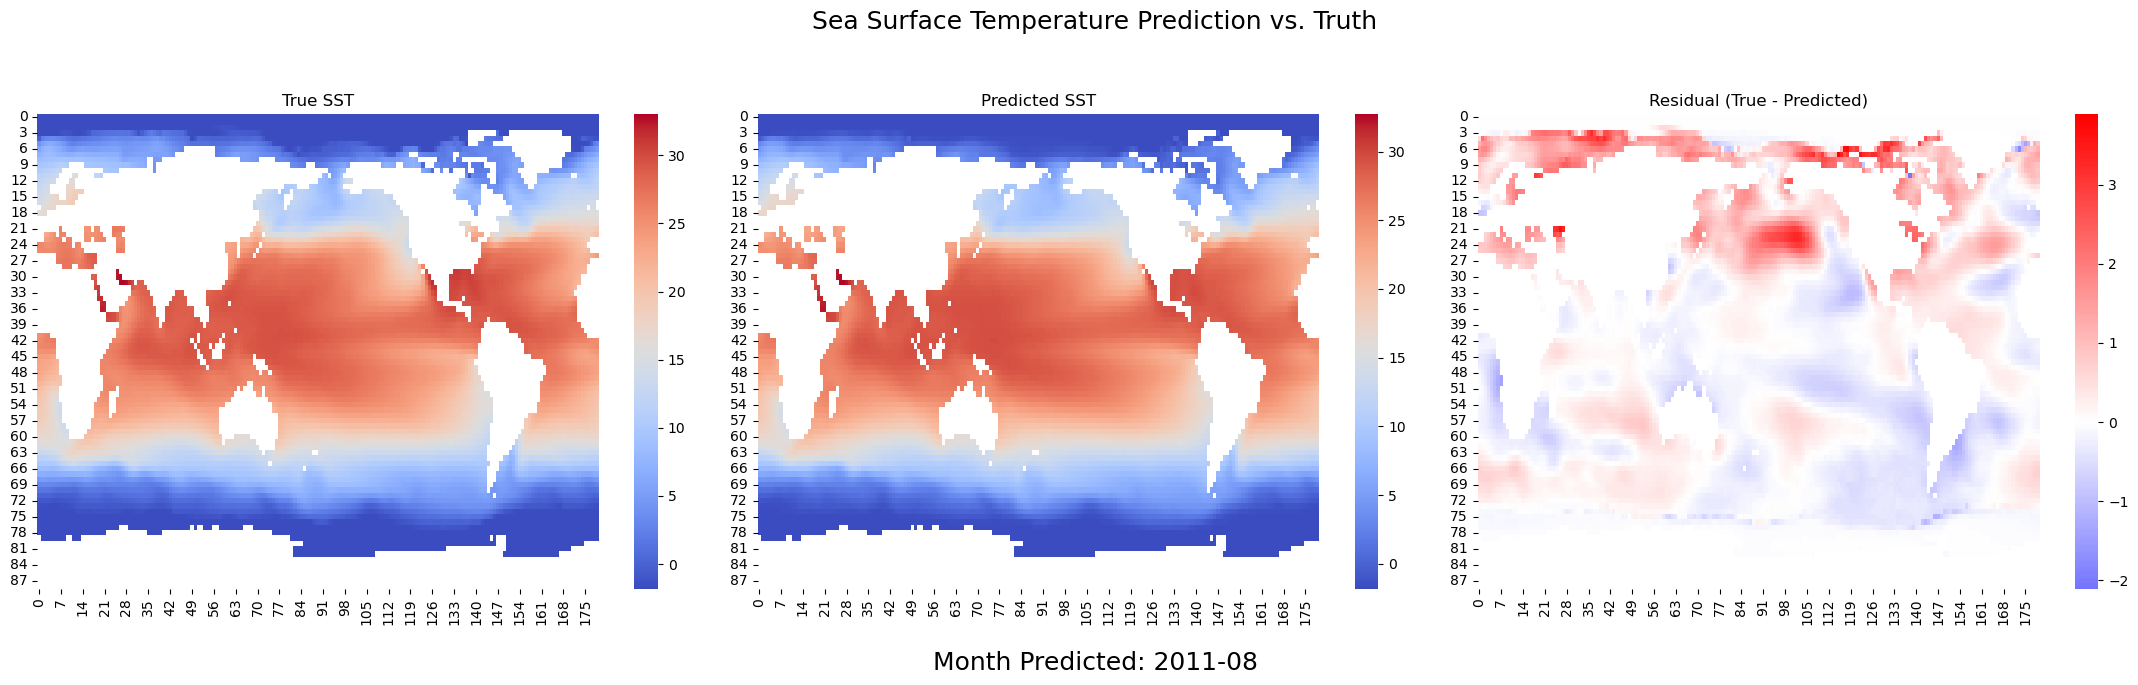

In [37]:
sample_idx = 0
plot_sst_sample(sample_idx, y_test, y_pred, valid_mask, ds, X)

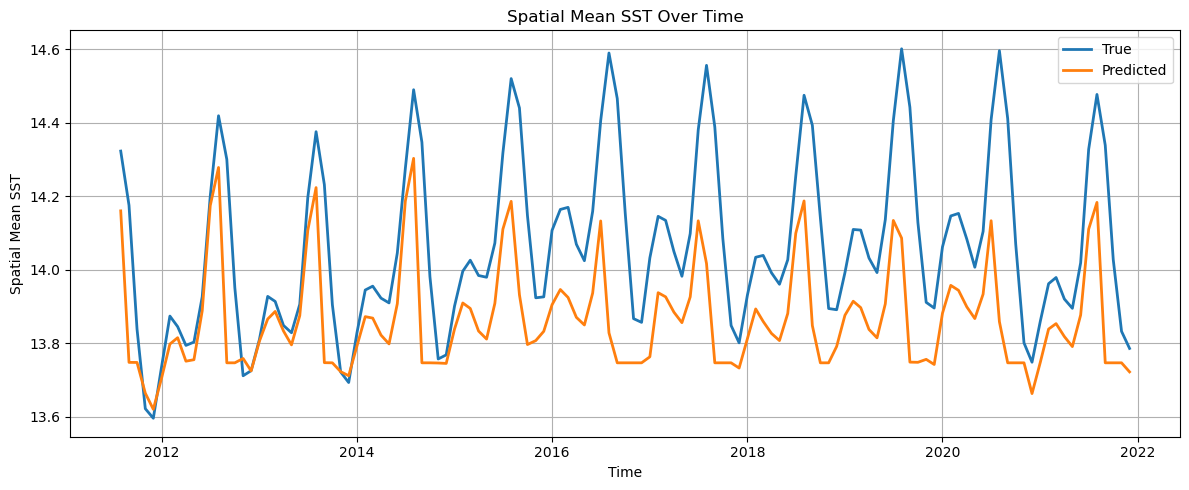

In [38]:
# Compute spatial mean at each time step
mean_true_time_series = np.nanmean(y_test, axis=1)  # shape: (time,)
mean_pred_time_series = np.nanmean(y_pred, axis=1)  # shape: (time,)

# Get corresponding time values (optional)
n_total_samples = X.shape[0]
n_train = int(n_total_samples * 0.8)
time_vals = ds['time'].values[n_train + 1 : n_train + 1 + y_test.shape[0]]

# Plot time series of spatial means
plt.figure(figsize=(12, 5))
plt.plot(time_vals, mean_true_time_series, label='True', linewidth=2)
plt.plot(time_vals, mean_pred_time_series, label='Predicted', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Spatial Mean SST")
plt.title("Spatial Mean SST Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Exercise:** Try different regularization **and** kernel parameters.  Try to find the best penalized linear model you can.  How might you automate this?

**Exercise:** Look up different kernels provided in Sklearn.  Try them out.  Can you find a better peforming model?